<a href="https://colab.research.google.com/github/helloTestAcc/testPython/blob/master/MediaPipe_test_%26_py_han_f_m_e.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2023 The MediaPipe Authors. All Rights Reserved.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Hand Landmarks Detection with MediaPipe Tasks

This notebook shows you how to use MediaPipe Tasks Python API to detect hand landmarks from images.

## Preparation

Let's start with installing MediaPipe.

In [ ]:
!pip install -q mediapipe

Then download an off-the-shelf model bundle. Check out the [MediaPipe documentation](https://developers.google.com/mediapipe/solutions/vision/hand_landmarker#models) for more information about this model bundle.

In [ ]:
!wget -q https://storage.googleapis.com/mediapipe-models/hand_landmarker/hand_landmarker/float16/1/hand_landmarker.task

## Visualization utilities

In [ ]:
#@markdown We implemented some functions to visualize the hand landmark detection results. <br/> Run the following cell to activate the functions.

from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np

MARGIN = 10  # pixels
FONT_SIZE = 1
FONT_THICKNESS = 1
HANDEDNESS_TEXT_COLOR = (88, 205, 54) # vibrant green

def draw_landmarks_on_image(rgb_image, detection_result):
  hand_landmarks_list = detection_result.hand_landmarks
  handedness_list = detection_result.handedness
  annotated_image = np.copy(rgb_image)

  # Loop through the detected hands to visualize.
  for idx in range(len(hand_landmarks_list)):
    hand_landmarks = hand_landmarks_list[idx]
    handedness = handedness_list[idx]

    # Draw the hand landmarks.
    hand_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    hand_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in hand_landmarks
    ])
    solutions.drawing_utils.draw_landmarks(
      annotated_image,
      hand_landmarks_proto,
      solutions.hands.HAND_CONNECTIONS,
      solutions.drawing_styles.get_default_hand_landmarks_style(),
      solutions.drawing_styles.get_default_hand_connections_style())

    # Get the top left corner of the detected hand's bounding box.
    height, width, _ = annotated_image.shape
    x_coordinates = [landmark.x for landmark in hand_landmarks]
    y_coordinates = [landmark.y for landmark in hand_landmarks]
    text_x = int(min(x_coordinates) * width)
    text_y = int(min(y_coordinates) * height) - MARGIN

    # Draw handedness (left or right hand) on the image.
    cv2.putText(annotated_image, f"{handedness[0].category_name}",
                (text_x, text_y), cv2.FONT_HERSHEY_DUPLEX,
                FONT_SIZE, HANDEDNESS_TEXT_COLOR, FONT_THICKNESS, cv2.LINE_AA)

  return annotated_image

## Download test image

Let's grab a test image that we'll use later. The image is from [Unsplash](https://unsplash.com/photos/mt2fyrdXxzk).

In [ ]:
!wget -q -O image.jpg https://storage.googleapis.com/mediapipe-tasks/hand_landmarker/woman_hands.jpg

import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread("image.jpg")
cv2_imshow(img)

Optionally, you can upload your own image. If you want to do so, uncomment and run the cell below.

In [ ]:
# from google.colab import files
# uploaded = files.upload()

# for filename in uploaded:
#   content = uploaded[filename]
#   with open(filename, 'wb') as f:
#     f.write(content)

# if len(uploaded.keys()):
#   IMAGE_FILE = next(iter(uploaded))
#   print('Uploaded file:', IMAGE_FILE)

## Running inference and visualizing the results

Here are the steps to run hand landmark detection using MediaPipe.

Check out the [MediaPipe documentation](https://developers.google.com/mediapipe/solutions/vision/hand_landmarker/python) to learn more about configuration options that this solution supports.


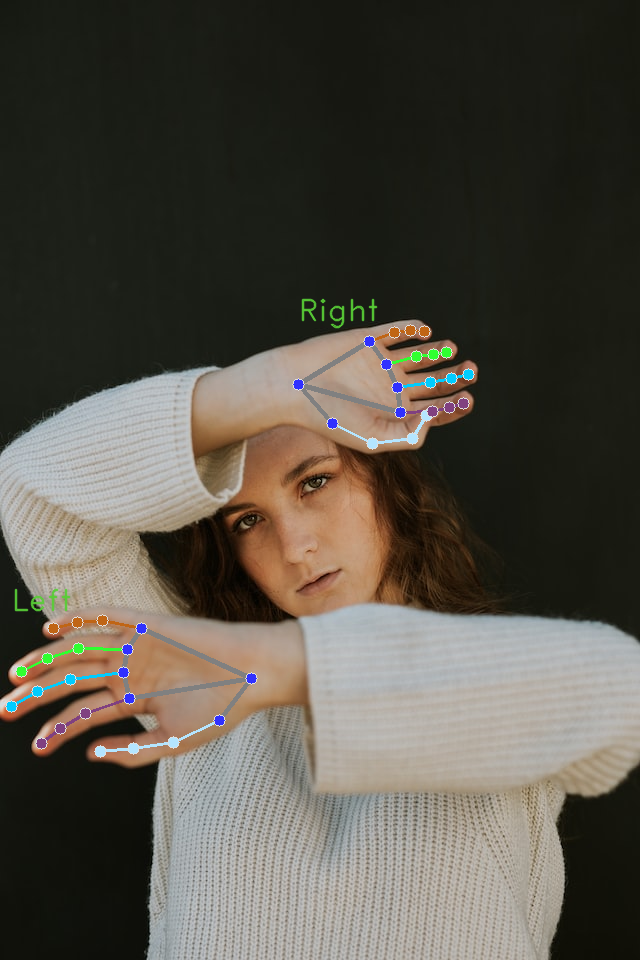

In [ ]:
# STEP 1: Import the necessary modules.
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

# STEP 2: Create an HandLandmarker object.
base_options = python.BaseOptions(model_asset_path='hand_landmarker.task')
options = vision.HandLandmarkerOptions(base_options=base_options,
                                       num_hands=2)
detector = vision.HandLandmarker.create_from_options(options)

# STEP 3: Load the input image.
image = mp.Image.create_from_file("image.jpg")

# STEP 4: Detect hand landmarks from the input image.
detection_result = detector.detect(image)

# STEP 5: Process the classification result. In this case, visualize it.
annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)
cv2_imshow(cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR))

In [ ]:
import cv2
import mediapipe as mp
import numpy as np


mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=False, max_num_hands=1, min_detection_confidence=0.5)
mp_drawing = mp.solutions.drawing_utils

cap = cv2.VideoCapture(0)
print('asddf')
while cap.isOpened():
    print('asdf')
    ret, frame = cap.read()
    if not ret:
        break

    # BGR 이미지 -> RGB로 변환
    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    results = hands.process(image)

    # RGB 이미지 -> 다시 BGR로 변환
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            mp_drawing.draw_landmarks(image, hand_landmarks, mp_hands.HAND_CONNECTIONS)

            # 특징점 좌표 수집
            landmarks = np.array([[lm.x, lm.y, lm.z] for lm in hand_landmarks.landmark])
            print(landmarks)  # 데이터 저장 및 학습에 사용

    cv2.imshow('Hand Tracking', image)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


asddf


In [ ]:
import pandas as pd

data = []  # [[x1, y1, z1, x2, y2, z2, ..., label], ...]

# 예시로 데이터 수집 및 라벨링
data.append(list(landmarks.flatten()) + ['label_of_hand_shape'])

df = pd.DataFrame(data)
df.to_csv('hand_gestures.csv', index=False)

NameError: name 'landmarks' is not defined

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename


In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

<IPython.core.display.Javascript object>

KeyboardInterrupt: 

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4534  100  4534    0     0  42061      0 --:--:-- --:--:-- --:--:-- 42373
<class 'mediapipe.python.solution_base.SolutionOutputs'>
asdf
[[ 4.61146235e-02  5.31789124e-01  1.10478607e-06]
 [ 1.73632443e-01  4.24383193e-01 -4.77703288e-03]
 [ 3.21557045e-01  4.47672158e-01 -2.39713322e-02]
 [ 4.11853790e-01  5.49410939e-01 -3.94824408e-02]
 [ 4.44141716e-01  6.30612850e-01 -5.49265258e-02]
 [ 3.86627972e-01  4.55457389e-01 -9.57157686e-02]
 [ 6.00692987e-01  4.39823180e-01 -1.29647404e-01]
 [ 7.24719763e-01  4.32209611e-01 -1.45408407e-01]
 [ 8.20910513e-01  4.27143872e-01 -1.51925951e-01]
 [ 3.83503348e-01  5.66285908e-01 -1.01153716e-01]
 [ 5.93748569e-01  5.98805010e-01 -1.13497451e-01]
 [ 7.15419412e-01  6.15362465e-01 -1.12885721e-01]
 [ 8.02622557e-01  6.34556651e-01 -1.13223486e-01]
 [ 3.55891764e-01  6.58776402e-01 -9.8

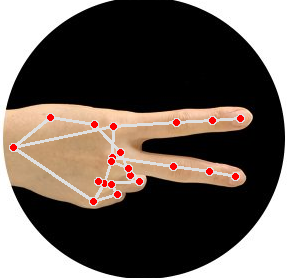

In [ ]:
from google.colab.patches import cv2_imshow
!curl -o logo.png https://colab.research.google.com/img/colab_favicon_256px.png
import cv2
import mediapipe as mp
import numpy as np




mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=False, max_num_hands=1, min_detection_confidence=0.5)
mp_drawing = mp.solutions.drawing_utils
import cv2
import mediapipe as mp

# MediaPipe Hands 초기화
mp_hands = mp.solutions.hands
hands = mp_hands.Hands()
mp_drawing = mp.solutions.drawing_utils

# 이미지 파일 경로 설정
image_path = "/content/1.PNG"  # 이미지 파일이 있는 경로로 변경

# 이미지 읽어오기
image = cv2.imread(image_path)


# BGR 이미지 -> RGB로 변환
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image.flags.writeable = False

# 손 인식
results = hands.process(image)

print(results)

# RGB 이미지 -> 다시 BGR로 변환
image.flags.writeable = True
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

# 손이 감지되면
if results.multi_hand_landmarks:
    for hand_landmarks in results.multi_hand_landmarks:
        mp_drawing.draw_landmarks(image, hand_landmarks, mp_hands.HAND_CONNECTIONS)
        print("asdf")
#특징점 좌표 수집
        landmarks = np.array([[lm.x, lm.y, lm.z] for lm in hand_landmarks.landmark])
        print(landmarks)  # 데이터 저장 및 학습에 사용

# 결과 이미지 출력
img= cv2.imread('Hand Tracking', image)
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
# 특징점 데이터를 CSV 파일에 저장
import pandas as pd

data = []  # [[x1, y1, z1, x2, y2, z2, ..., label], ...]

# 예시로 데이터 수집 및 라벨링
data.append(list(landmarks.flatten()) + ['label_of_hand_shape'])

df = pd.DataFrame(data)
df.to_csv('hand_gestures.csv', index=False)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import pandas as pd
import numpy as np

# 데이터 불러오기
data = pd.read_csv('/content/hand_gestures.csv')
X = data.iloc[:, :-1].values  # 입력 데이터
y = pd.get_dummies(data['63']).values  # 레이블

# 모델 정의
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(y.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 학습
model.fit(X, y, epochs=50, batch_size=32, validation_split=0.2)

# 모델 저장
model.save('hand_shape_model.h5')


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 1.0751 - val_accuracy: 0.0000e+00 - val_loss: 1.1313
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.5000 - loss: 0.9940 - val_accuracy: 0.0000e+00 - val_loss: 1.2185
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.5000 - loss: 0.9242 - val_accuracy: 0.0000e+00 - val_loss: 1.3084
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.5000 - loss: 0.8673 - val_accuracy: 0.0000e+00 - val_loss: 1.3949
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.5000 - loss: 0.8202 - val_accuracy: 0.0000e+00 - val_loss: 1.4733
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 1.0000 - loss: 0.7782 - val_accuracy: 0.0000e+00 - val_loss: 1.5524
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 1.0000 - loss: 0.7425 - val_accuracy: 0.0000e+00 - val_loss: 1.6334
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - accuracy: 1.0000 - loss: 0.7098 - val_accuracy: 0.0000e

In [ ]:
model = tf.keras.models.load_model('/content/hand_shape_model.h5')

def predict_hand_shape(landmarks):
    input_data = np.array([landmarks.flatten()])
    prediction = model.predict(input_data)
    print(prediction)
    predicted_label = np.argmax(prediction)
    return predicted_label

In [ ]:

# 이미지 파일 경로 설정
image_path = "/content/1.PNG"  # 이미지 파일이 있는 경로로 변경

# 이미지 읽어오기
image = cv2.imread(image_path)


# BGR 이미지 -> RGB로 변환
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image.flags.writeable = False

# 손 인식
results = hands.process(image)


# RGB 이미지 -> 다시 BGR로 변환
image.flags.writeable = True
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

# 손이 감지되면
if results.multi_hand_landmarks:
    for hand_landmarks in results.multi_hand_landmarks:
        mp_drawing.draw_landmarks(image, hand_landmarks, mp_hands.HAND_CONNECTIONS)
#특징점 좌표 수집
        landmarks = np.array([[lm.x, lm.y, lm.z] for lm in hand_landmarks.landmark])
        print(predict_hand_shape(landmarks))
        #print(landmarks)  # 데이터 저장 및 학습에 사용


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
[[0.101643   0.8957051  0.00265194]]
1


In [ ]:
pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 45.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 31.2 MB/s eta 0:00:00


In [ ]:
from konlpy.tag import Okt
okt = Okt()


def generate_word(chars):
    okt = Okt()
    # 입력된 자모를 하나의 문자열로 합침
    text = ''.join(chars)

    # 형태소 분석
    morphs = okt.morphs(text)

   # print(morphs)

    # 형태소 중 명사만 추출 (예시)
    nouns = [morph for morph, tag in morphs if tag == 'Noun']

    # 생성된 단어 출력 (여러 가지 방법으로 처리 가능)
    if nouns:
        return nouns[0]  # 첫 번째 명사를 반환
    else:
        return "의미있는 단어를 생성할 수 없습니다."


def generate_word2(chars):
    okt = Okt()
    # 입력된 자모를 하나의 문자열로 합침
    text = ''.join(chars)

    # 형태소 분석
    morphs = okt.morphs(text)

    words = okt.morphs(text)  # 예측된 문자열을 형태소 분석

    # 결과 출력
    print(words)




In [ ]:
test = ''.join('ㄱㅏ')


print(test)

ㄱㅏ


In [ ]:
CHOSUNG = ['ㄱ', 'ㄴ', 'ㄷ', 'ㄹ', 'ㅁ', 'ㅂ', 'ㅅ', 'ㅇ', 'ㅈ', 'ㅊ', 'ㅋ', 'ㅌ', 'ㅍ', 'ㅎ']  # 초성 리스트
JUNGSUNG = ['ㅏ', 'ㅐ', 'ㅑ', 'ㅒ', 'ㅓ', 'ㅔ', 'ㅕ', 'ㅖ', 'ㅗ', 'ㅘ', 'ㅙ', 'ㅚ', 'ㅛ', 'ㅜ', 'ㅝ', 'ㅞ', 'ㅟ', 'ㅠ', 'ㅡ', 'ㅢ', 'ㅣ']  # 중성 리스트
JONGSUNG = ['ㄱ','ㄴ', 'ㄷ', 'ㄹ', 'ㅁ', 'ㅂ', 'ㅅ', 'ㅇ', 'ㅈ', 'ㅊ', 'ㅋ', 'ㅌ', 'ㅍ', 'ㅎ', 'ㄲ', 'ㄳ', 'ㄴㄴ', 'ㄵ', 'ㄶ', 'ㄷㄷ', 'ㄹㄹ', 'ㄺ', 'ㄻ','ㄼ', 'ㄽ', 'ㄾ', 'ㄿ', 'ㅀ', 'ㅁㅁ', 'ㅂㅂ', 'ㅄ','ㅅㅅ', 'ㅇㅇ', 'ㅈㅈ', 'ㅊㅊ', 'ㅋ', 'ㅌ', 'ㅍ', 'ㅎ']  #ㅇ 종성 리스트 (빈 문자열 포함)

def combine_jamos(chosung, jungsung, jongsung=''):
    """
    초성, 중성, 종성을 조합하여 한글 음절을 생성하는 함수

    Args:
        chosung: 초성
        jungsung: 중성
        jongsung: 종성 (선택적)

    Returns:
        str: 생성된 한글 음절
    """

    # 한글 유니코드 시작 값
    BASE_UNICODE = 0xAC00

    # 초성, 중성, 종성의 인덱스 찾기
    chosung_index = CHOSUNG.index(chosung)
    jungsung_index = JUNGSUNG.index(jungsung)
    jongsung_index = JONGSUNG.index(jongsung)

    # 한글 유니코드 값 계산
    unicode_value = BASE_UNICODE + (chosung_index * 21 + jungsung_index) * 28 + jongsung_index

    # 유니코드 값을 문자로 변환
    return chr(unicode_value)

# 사용자 입력 받기
while True:
    chosung = input("초성을 입력하세요 (종료하려면 q 입력): ")
    if chosung == 'q':
        break
    jungsung = input("중성을 입력하세요: ")
    jongsung = input("종성을 입력하세요 (없으면 Enter): ") or ''

    # 한글 음절 생성
    hangul = combine_jamos(chosung, jungsung, jongsung)
    print("생성된 한글:", hangul)

초성을 입력하세요 (종료하려면 q 입력): ㄱ
중성을 입력하세요: ㅏ
종성을 입력하세요 (없으면 Enter): ㅇ
생성된 한글: 갇
초성을 입력하세요 (종료하려면 q 입력): ㄱ
중성을 입력하세요: ㅏ
종성을 입력하세요 (없으면 Enter): ㅇ
생성된 한글: 갇
초성을 입력하세요 (종료하려면 q 입력): ㄱ
중성을 입력하세요: ㅗ
종성을 입력하세요 (없으면 Enter): ㅇ
생성된 한글: 곧
초성을 입력하세요 (종료하려면 q 입력): ㄱ
중성을 입력하세요: ㅗ
종성을 입력하세요 (없으면 Enter): ㄷ
생성된 한글: 곢


KeyboardInterrupt: Interrupted by user

In [ ]:
CHOSUNG = ['ㄱ', 'ㄴ', 'ㄷ', 'ㄹ', 'ㅁ', 'ㅂ', 'ㅅ', 'ㅇ', 'ㅈ', 'ㅊ', 'ㅋ', 'ㅌ', 'ㅍ', 'ㅎ']
JUNGSUNG = ['ㅏ', 'ㅐ', 'ㅑ', 'ㅒ', 'ㅓ', 'ㅔ', 'ㅕ', 'ㅖ', 'ㅗ', 'ㅘ', 'ㅙ', 'ㅚ', 'ㅛ', 'ㅜ', 'ㅝ', 'ㅞ', 'ㅟ', 'ㅠ', 'ㅡ', 'ㅢ', 'ㅣ']
JONGSUNG = ['', 'ㄱ', 'ㄴ', 'ㄷ', 'ㄹ', 'ㅁ', 'ㅂ', 'ㅅ', 'ㅇ', 'ㅈ', 'ㅊ', 'ㅋ', 'ㅌ', 'ㅍ', 'ㅎ', 'ㄲ', 'ㄳ', 'ㄴㄴ', 'ㄵ', 'ㄶ', 'ㄷㄷ', 'ㄹㄹ', 'ㄺ', 'ㄻ', 'ㄼ', 'ㄽ', 'ㄾ', 'ㄿ', 'ㅀ', 'ㅁㅁ', 'ㅂㅂ', 'ㅄ', 'ㅅㅅ', 'ㅇㅇ', 'ㅈㅈ', 'ㅊㅊ', 'ㅋ', 'ㅌ', 'ㅍ', 'ㅎ']

def combine_jamos(chosung, jungsung, jongsung=''):
    """
    초성, 중성, 종성을 조합하여 한글 음절을 생성하는 함수

    Args:
        chosung: 초성
        jungsung: 중성
        jongsung: 종성 (선택적)

    Returns:
        str: 생성된 한글 음절
    """

    print(jongsung)
    BASE_UNICODE = 0xAC00
    CHOSUNG_COUNT = len(CHOSUNG)
    JUNGSUNG_COUNT = len(JUNGSUNG)
    JONGSUNG_COUNT = len(JONGSUNG)


    # 유효성 검사 (예시)
    if chosung not in CHOSUNG or jungsung not in JUNGSUNG or jongsung not in JONGSUNG:
        return "잘못된 입력입니다."

    chosung_index = CHOSUNG.index(chosung)
    jungsung_index = JUNGSUNG.index(jungsung)
    jongsung_index = JONGSUNG.index(jongsung)

    unicode_value = BASE_UNICODE + (chosung_index * JUNGSUNG_COUNT + jungsung_index) * JONGSUNG_COUNT + jongsung_index
    return chr(unicode_value)

# 사용자 입력 받기
while True:
    chosung = input("초성을 입력하세요 (종료하려면 q 입력): ")
    if chosung == 'q':
        break
    jungsung = input("중성을 입력하세요: ")
    jongsung = input("종성을 입력하세요 (없으면 Enter): ") or ''

    # 한글 음절 생성
    hangul = combine_jamos(chosung, jungsung, jongsung)
    print("생성된 한글:", hangul)

초성을 입력하세요 (종료하려면 q 입력): ㄱ
중성을 입력하세요: ㅏ
종성을 입력하세요 (없으면 Enter): ㅇ
ㅇ
생성된 한글: 갈


KeyboardInterrupt: Interrupted by user

In [ ]:
CHOSUNG = ['ㄱ', 'ㄲ', 'ㄴ', 'ㄷ', 'ㄸ', 'ㄹ', 'ㅁ', 'ㅂ', 'ㅃ', 'ㅅ', 'ㅆ', 'ㅇ', 'ㅈ', 'ㅉ', 'ㅊ','ㅋ', 'ㅌ', 'ㅍ', 'ㅎ']
JUNGSUNG = ['ㅏ', 'ㅐ', 'ㅑ', 'ㅒ', 'ㅓ', 'ㅔ', 'ㅕ', 'ㅖ', 'ㅗ', 'ㅠ', 'ㅘ', 'ㅛ', 'ㅙ', 'ㅚ', 'ㅜ', 'ㅝ', 'ㅞ', 'ㅟ', 'ㅡ', 'ㅢ', 'ㅣ']
JONGSUNG = ['', 'ㄱ', 'ㄲ', 'ㄳ', 'ㄴ', 'ㄵ', 'ㄶ', 'ㄷ', 'ㄹ', 'ㄺ', 'ㄻ', 'ㄼ', 'ㄽ', 'ㄾ', 'ㄿ', 'ㅀ', 'ㅁ', 'ㅂ', 'ㅄ', 'ㅅ', 'ㅆ', 'ㅇ', 'ㅈ', 'ㅊ', 'ㅋ', 'ㅌ', 'ㅍ', 'ㅎ']

def combine_jamos(chosung, jungsung, jongsung=''):
    """
    초성, 중성, 종성을 조합하여 한글 음절을 생성하는 함수

    Args:
        chosung: 초성
        jungsung: 중성
        jongsung: 종성 (선택적)

    Returns:
        str: 생성된 한글 음절
    """

    print(jongsung)
    BASE_UNICODE = 0xAC00
    CHOSUNG_COUNT = len(CHOSUNG)
    JUNGSUNG_COUNT = len(JUNGSUNG)
    JONGSUNG_COUNT = len(JONGSUNG)


    # 유효성 검사 (예시)
    if chosung not in CHOSUNG or jungsung not in JUNGSUNG or jongsung not in JONGSUNG:
        return "잘못된 입력입니다."

    chosung_index = CHOSUNG.index(chosung)
    jungsung_index = JUNGSUNG.index(jungsung)
    jongsung_index = JONGSUNG.index(jongsung)

    unicode_value = BASE_UNICODE + (chosung_index * JUNGSUNG_COUNT + jungsung_index) * JONGSUNG_COUNT + jongsung_index
    return chr(unicode_value)

# 사용자 입력 받기
while True:
    chosung = input("초성을 입력하세요 (종료하려면 q 입력): ")
    if chosung == 'q':
        break
    jungsung = input("중성을 입력하세요: ")
    jongsung = input("종성을 입력하세요 (없으면 Enter): ") or ''

    # 한글 음절 생성
    hangul = combine_jamos(chosung, jungsung, jongsung)
    print("생성된 한글:", hangul)

초성을 입력하세요 (종료하려면 q 입력): ㄱ
중성을 입력하세요: ㅏ
종성을 입력하세요 (없으면 Enter): ㅇ
ㅇ
생성된 한글: 강
초성을 입력하세요 (종료하려면 q 입력): ㄱ
중성을 입력하세요: ㅏ
종성을 입력하세요 (없으면 Enter): ㄲ
ㄲ
생성된 한글: 갂
초성을 입력하세요 (종료하려면 q 입력): ㄱ
중성을 입력하세요: ㅂ
종성을 입력하세요 (없으면 Enter): ㄴ
ㄴ
생성된 한글: 잘못된 입력입니다.
초성을 입력하세요 (종료하려면 q 입력): ㄱ
중성을 입력하세요: ㅑ
종성을 입력하세요 (없으면 Enter): ㅇ
ㅇ
생성된 한글: 걍
초성을 입력하세요 (종료하려면 q 입력): ㄱ
중성을 입력하세요: ㅂ
종성을 입력하세요 (없으면 Enter): ㅇ
ㅇ
생성된 한글: 잘못된 입력입니다.
초성을 입력하세요 (종료하려면 q 입력): ㄱㄱㄱㄱㄱㄱㄱㄱㄱㄱㄱㄱㄱㄱㄱ
중성을 입력하세요: ㅏㅏㅏㅏㅏㅏㅏㅏㅏㅏㅏㅏ
종성을 입력하세요 (없으면 Enter): ㅇㅇㅇㅇㅇㅇㅇㅇㅇㅇㅇㅇㅇㅇ
ㅇㅇㅇㅇㅇㅇㅇㅇㅇㅇㅇㅇㅇㅇ
생성된 한글: 잘못된 입력입니다.
초성을 입력하세요 (종료하려면 q 입력): ㄱ
중성을 입력하세요: ㅏ
종성을 입력하세요 (없으면 Enter): ㅇ
ㅇ
생성된 한글: 강
초성을 입력하세요 (종료하려면 q 입력): ㅇ
중성을 입력하세요: ㅏ
종성을 입력하세요 (없으면 Enter): 

생성된 한글: 아
초성을 입력하세요 (종료하려면 q 입력): ㅈ
중성을 입력하세요: ㅣ
종성을 입력하세요 (없으면 Enter): 

생성된 한글: 지
초성을 입력하세요 (종료하려면 q 입력): 강ㅏ지
중성을 입력하세요: ㅂ
종성을 입력하세요 (없으면 Enter): q
q
생성된 한글: 잘못된 입력입니다.
초성을 입력하세요 (종료하려면 q 입력): q


In [ ]:
pip install pyenchant

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 kB 2.0 MB/s eta 0:00:00


In [ ]:

pip install --upgrade enchant

In [ ]:
import enchant

# 한글 사전 파일 경로 설정
aff_file = "/content/ko.aff"
dic_file = "/content/ko.dic"

# 사전 로드
try:
    spell = enchant.DictWithPWL(aff_file, dic_file)
except enchant.DictError as e:
    print(f"사전 로드 실패: {e}")

# 단어 검사
word = "안녕하세요"
if spell.check('강ㅏ지'):
    print("맞춤법이 올바릅니다.")
else:
    suggestions = spell.suggest(word)
    print("제안:", suggestions)

AttributeError: module 'enchant' has no attribute 'DictWithPWL'

In [ ]:
pip install konlpy

In [ ]:
!pip install --upgrade konlpy


from konlpy.tag import Kkma
from konlpy.corpus import kobart

# 형태소 분석
kkma = Kkma()
morphs = kkma.morphs("강ㅏ지를")

# 유사 단어 찾기 (예시)
kobart_vocab = kobart.vocab()
similar_words = kobart_vocab.most_similar(morphs[0])

ImportError: cannot import name 'kobart' from 'konlpy.corpus' (/usr/local/lib/python3.10/dist-packages/konlpy/corpus.py)

In [ ]:
!pip install transformers
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

# KoBART 모델 로드
tokenizer = AutoTokenizer.from_pretrained("gogamza/kobart-base-v1.0")
model = AutoModelForSeq2SeqLM.from_pretrained("gogamza/kobart-base-v1.0")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


OSError: gogamza/kobart-base-v1.0 is not a local folder and is not a valid model identifier listed on 'https://huggingface.co/models'
If this is a private repository, make sure to pass a token having permission to this repo either by logging in with `huggingface-cli login` or by passing `token=<your_token>`

In [ ]:
import requests

def get_related_searches(query):
  # 네이버 검색 API 호출 (자신의 API 키로 변경)
  url = "https://openapi.naver.com/v1/search/search.json?query=" + query
  headers = {"X-Naver-Client-Id": "YOUR_CLIENT_ID", "X-Naver-Client-Secret": "YOUR_CLIENT_SECRET"}
  response = requests.get(url, headers=headers)
  json_object = json.loads(response.text)
  related_searches = json_object['related']['query']
  return related_searches

corrected_text = "강ㅏ지"
related_searches = get_related_searches(corrected_text)
print(related_searches)

Error: API request failed with status code 401
No related searches found.


In [ ]:
!pip install py-hanspell
from hanspell import spell_checker

def correct_and_suggest(text):
  spelled_text = spell_checker.check(text)
  corrected_text = spelled_text.checked
  return corrected_text

text = "강ㅏ지를"
corrected_text = correct_and_suggest(text)
print(corrected_text)  # 출력: 강아지

  Using cached py-hanspell-1.1.tar.gz (3.0 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


ModuleNotFoundError: No module named 'hanspell'

In [ ]:
CHOSUNG = ['ㄱ', 'ㄲ', 'ㄴ', 'ㄷ', 'ㄸ', 'ㄹ', 'ㅁ', 'ㅂ', 'ㅃ', 'ㅅ', 'ㅆ', 'ㅇ', 'ㅈ', 'ㅉ', 'ㅊ','ㅋ', 'ㅌ', 'ㅍ', 'ㅎ']
JUNGSUNG = ['ㅏ', 'ㅐ', 'ㅑ', 'ㅒ', 'ㅓ', 'ㅔ', 'ㅕ', 'ㅖ', 'ㅗ', 'ㅠ', 'ㅘ', 'ㅛ', 'ㅙ', 'ㅚ', 'ㅜ', 'ㅝ', 'ㅞ', 'ㅟ', 'ㅡ', 'ㅢ', 'ㅣ']
JONGSUNG = ['', 'ㄱ', 'ㄲ', 'ㄳ', 'ㄴ', 'ㄵ', 'ㄶ', 'ㄷ', 'ㄹ', 'ㄺ', 'ㄻ', 'ㄼ', 'ㄽ', 'ㄾ', 'ㄿ', 'ㅀ', 'ㅁ', 'ㅂ', 'ㅄ', 'ㅅ', 'ㅆ', 'ㅇ', 'ㅈ', 'ㅊ', 'ㅋ', 'ㅌ', 'ㅍ', 'ㅎ']

def combine_jamos(chosung, jungsung, jongsung=''):
    """
    초성, 중성, 종성을 조합하여 한글 음절을 생성하는 함수

    Args:
        chosung: 초성
        jungsung: 중성
        jongsung: 종성 (선택적)

    Returns:
        str: 생성된 한글 음절
    """

    print(jongsung)
    BASE_UNICODE = 0xAC00
    CHOSUNG_COUNT = len(CHOSUNG)
    JUNGSUNG_COUNT = len(JUNGSUNG)
    JONGSUNG_COUNT = len(JONGSUNG)


    # 유효성 검사 (예시)
    if chosung not in CHOSUNG or jungsung not in JUNGSUNG or jongsung not in JONGSUNG:
        return "잘못된 입력입니다."

    chosung_index = CHOSUNG.index(chosung)
    jungsung_index = JUNGSUNG.index(jungsung)
    jongsung_index = JONGSUNG.index(jongsung)

    unicode_value = BASE_UNICODE + (chosung_index * JUNGSUNG_COUNT + jungsung_index) * JONGSUNG_COUNT + jongsung_index
    return chr(unicode_value)

# 사용자 입력 받기
while True:
    chosung = input("초성을 입력하세요 (종료하려면 q 입력): ")
    if chosung == 'q':
        break
    jungsung = input("중성을 입력하세요: ")
    jongsung = input("종성을 입력하세요 (없으면 Enter): ") or ''

    # 한글 음절 생성
    hangul = combine_jamos(chosung, jungsung, jongsung)
    print("생성된 한글:", hangul)

초성을 입력하세요 (종료하려면 q 입력): ㄱ
중성을 입력하세요: ㅏ
종성을 입력하세요 (없으면 Enter): ㅇ
ㅇ
생성된 한글: 강
초성을 입력하세요 (종료하려면 q 입력): ㅏ
중성을 입력하세요: ㅈ
종성을 입력하세요 (없으면 Enter): ㅣ
ㅣ
생성된 한글: 잘못된 입력입니다.
초성을 입력하세요 (종료하려면 q 입력):  
중성을 입력하세요: ㅏ
종성을 입력하세요 (없으면 Enter): 

생성된 한글: 잘못된 입력입니다.
초성을 입력하세요 (종료하려면 q 입력): ㄱ
중성을 입력하세요: ㅏ
종성을 입력하세요 (없으면 Enter): ㅄ
ㅄ
생성된 한글: 값
초성을 입력하세요 (종료하려면 q 입력): q
